## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    try:
        time_split = time_string.split(':')
        return int(time_split[0]) * 60.0 + float(time_split[1])
    except AttributeError:
        return time_string

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,787536,543640,836927,74470,520613
run_date,2016-07-23,2011-07-17,2017-07-23,2001-07-22,2010-12-19
place,福島,京都,福島,新潟,小倉
race,8R,2R,3R,7R,11R
title,3歳上500万下,3歳未勝利,3歳未勝利,3歳上500万下,愛知杯(G3)
type,芝,ダ,ダ,ダ,芝
track,右,右,右,左,右
distance,2600,1800,1150,1700,2000
weather,曇,晴,小雨,晴,晴
condition,良,良,良,良,良
time,14:05,10:30,11:10,13:20,15:35


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,run_time_last_600,win_odds,win_fav,horse_id,jockey_id,trainer_id
count,856883.000000,856883.000000,856883.000000,856883.000000,856883.000000,856873.000000,856883.000000,856883.000000,8.568830e+05,856883.000000,856883.000000
mean,1628.705290,4.761106,7.854492,54.977173,101.317324,36.558623,65.701969,7.824073,2.005071e+09,1228.591001,729.018428
std,432.607865,2.268119,4.441168,1.800043,30.068261,4.679438,94.028350,4.426237,5.343048e+06,1145.264482,506.681028
min,1000.000000,1.000000,1.000000,47.000000,53.700000,12.700000,1.000000,1.000000,1.986102e+09,140.000000,101.000000
25%,1200.000000,3.000000,4.000000,54.000000,75.100000,35.600000,8.700000,4.000000,2.000109e+09,706.000000,374.000000
50%,1600.000000,5.000000,8.000000,55.000000,99.400000,37.000000,25.700000,8.000000,2.005104e+09,1031.000000,1001.000000
75%,1800.000000,7.000000,11.000000,56.000000,115.500000,38.600000,82.200000,11.000000,2.009109e+09,1102.000000,1057.000000
max,4260.000000,8.000000,18.000000,66.000000,326.400000,99.800000,999.900000,18.000000,2.015110e+09,5551.000000,5717.000000


### 2.1.2 Race Condition 

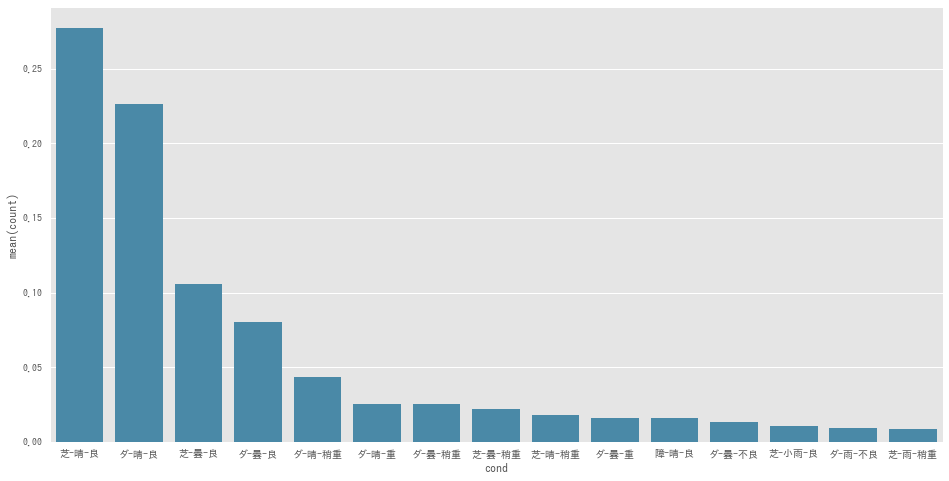

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

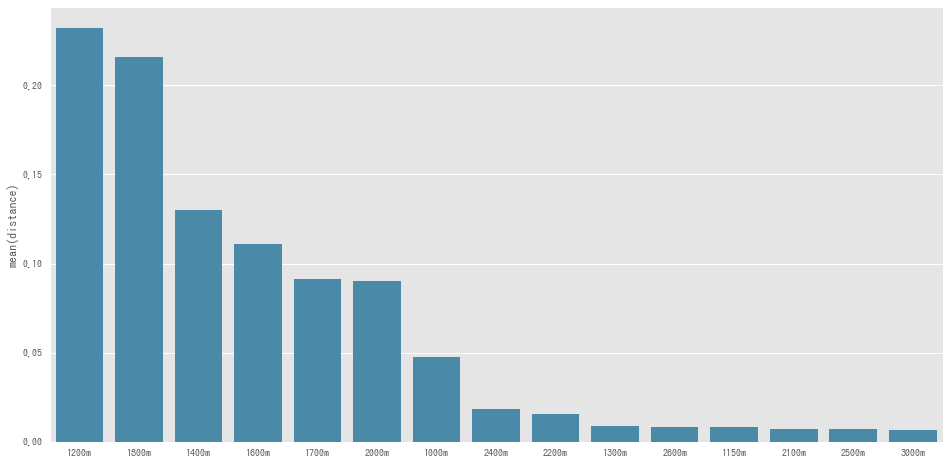

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.196e+08
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:39:48   Log-Likelihood:            -2.5548e+06
No. Observations:              856883   AIC:                         5.110e+06
Df Residuals:                  856882   BIC:                         5.110e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0627   3.06e-06   2.05e+04      0.0

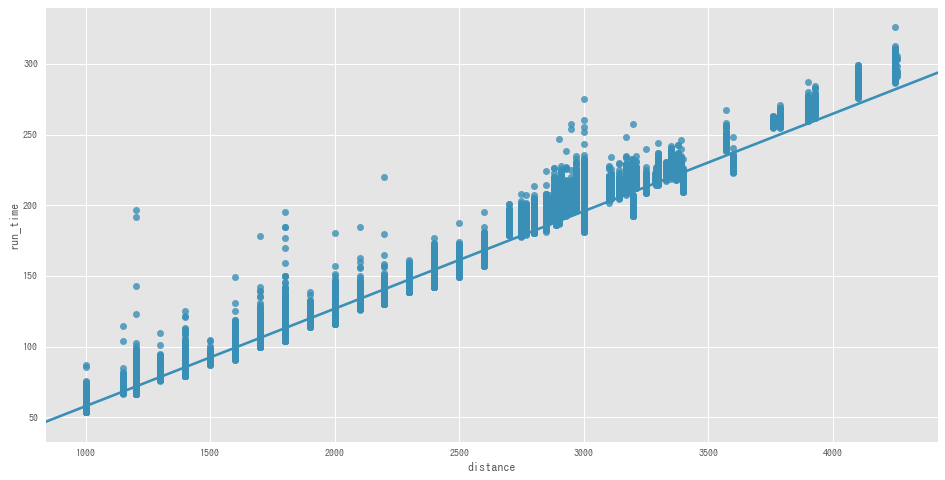

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], race_df['distance'])
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,48073,83327,6839,69973,57879
horse_id,2007102903,2015109119,1998100182,2012101312,2009102350
horse_name,テイラーバートン,クロヅルストーリー,ヒロペニトレイト,ゲットミー,ハタノヴァンクール
date_of_birth,2007年2月21日,2015年5月20日,1998年2月23日,2012年4月29日,2009年5月16日
trainer,角居勝彦 (栗東),作田誠二 (栗東),佐藤晴記 (岩手),千田輝彦 (栗東),昆貢 (栗東)
owner,社台レースホース,杉浦和也,伊藤和彦,薪浦州平,グッドラック・ファーム
breeder,社台ファーム,田上勝雄,勝川牧場,下川茂広,グッドラック・ファーム
place_of_birth,千歳市,宮崎県,新冠町,日高町,日高町
transaction_price,-,-,-,-,-
prize_obtained,"7,029万円 (中央)",0万円,581万円 (中央) /123万円 (地方),110万円 (中央) /50万円 (地方),"5,211万円 (中央) /1億8,583万円 (地方)"
race_record,18戦3勝 [ 3-2-4-9 ],5戦0勝 [ 0-0-0-5 ],37戦0勝 [ 0-5-3-29 ],17戦2勝 [ 2-1-1-13 ],17戦7勝 [ 7-3-0-7 ]


In [8]:
# Describe the columns of the dataframe
horse_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
horse_id,86803,NaN,NaN,NaN,2.0058e+09,5.64155e+06,1.9861e+09,2.0011e+09,2.0061e+09,2.0111e+09,2.01511e+09
horse_name,86803,85726,トリガー,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,86803,3905,2002年4月3日,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trainer,86801,2072,(地方),541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,86799,6511,サンデーレーシング,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breeder,86781,4264,ノーザンファーム,4743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,86800,106,浦河町,16125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_price,86803,7774,-,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize_obtained,86803,30894,0万円,14749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_record,86803,22569,2戦0勝 [ 0-0-0-2 ],3643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.2 Gender and Breed 

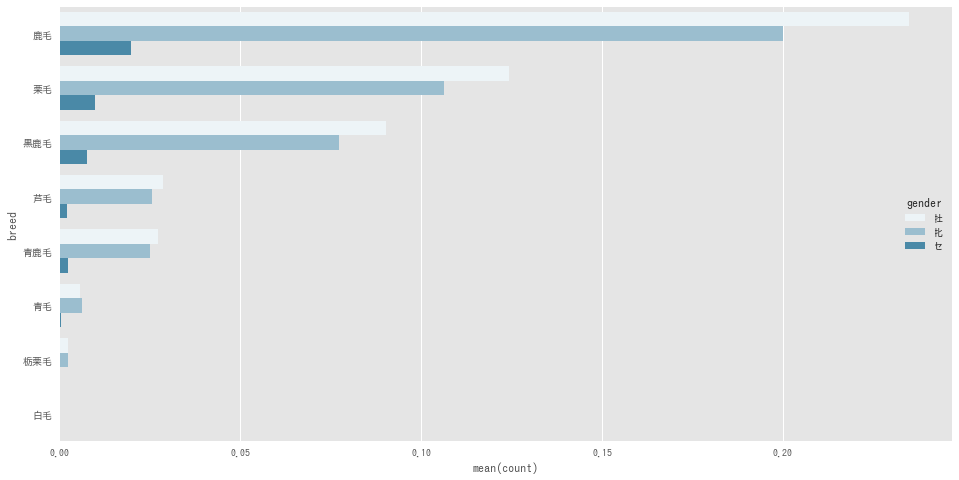

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [10]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse_id', right_on='horse_id')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0

# Replace abnormal age value by the original sex/age string
# ori_age = horse_race['sex_age'].apply(lambda string: float(string[1]))
# age_diff = horse_race['curr_age'] - ori_age
# horse_race.loc[abs(age_diff) > 1, 'curr_age'] = ori_age
horse_race.sample(n=5).T

,686641,466828,378363,324549,378377
run_date,2013-05-05 14:15:00,2009-06-21 16:01:00,2006-11-26 09:50:00,2006-04-30 10:50:00,2007-03-11 10:30:00
place,京都,札幌,東京,東京,中山
race,9R,10R,1R,3R,2R
title,矢車賞(500万下),3歳上500万下,2歳未勝利,3歳未勝利,3歳未勝利
type,芝,ダ,ダ,ダ,ダ
track,右,右,左,左,右
distance,2000,1700,1300,1600,1800
weather,晴,晴,曇,晴,雨
condition,良,良,良,良,不良
time,14:15,16:01,09:50,10:50,10:30


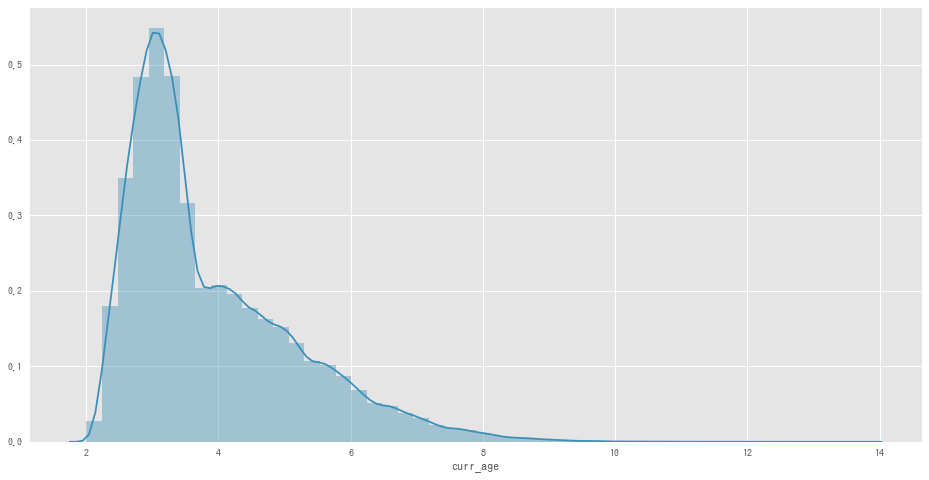

In [11]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

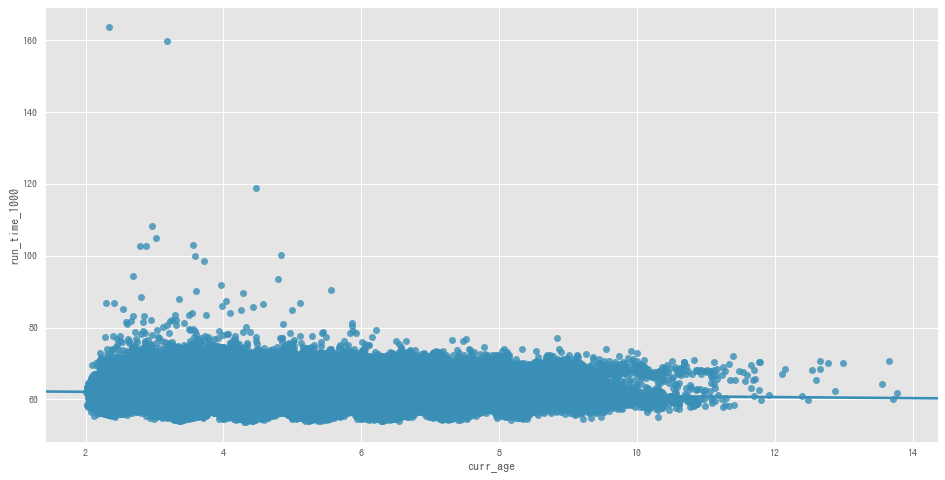

In [12]:
horse_race['run_time_1000'] = horse_race['run_time'] / (horse_race['distance'] / 1000)
sns.regplot(x='curr_age', y='run_time_1000', data=horse_race, color='#3A8FB7')

## 2.3 Individuals

In [13]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,3554,15872,63494,112527,24541
individual_id,021005,117800,036006,162033,440033
individual_type,馬主,馬主,馬主,馬主,生産者
name,渡辺孝男,高昭牧場,加藤徹,小坂功,信成牧場
year,2014,2015,2003,2017,2009
rank,232,602,420,464,72
first,3,0,3,1,6
second,6,0,1,2,6
third,7,2,2,4,7
out,116,61,14,12,46
races_major,5,1,0,0,11


In [14]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,103414.0,2002.726043,8.649315,1986.0,1996.0,2003.000,2010.000,2018.0
rank,103414.0,654.560156,446.568453,1.0,228.0,619.000,1055.000,1547.0
first,103349.0,3.633746,11.351973,0.0,0.0,1.000,3.000,592.0
second,103349.0,3.617868,10.397905,0.0,0.0,1.000,3.000,517.0
third,103349.0,3.612256,9.783531,0.0,0.0,1.000,3.000,437.0
races_major,103349.0,1.898238,7.523216,0.0,0.0,0.000,1.000,476.0
wins_major,103349.0,0.134873,0.806087,0.0,0.0,0.000,0.000,51.0
wins_special,103349.0,0.837821,3.086691,0.0,0.0,0.000,1.000,170.0
wins_flat,103349.0,2.661051,7.865808,0.0,0.0,1.000,2.000,385.0
wins_grass,103349.0,1.767003,6.583385,0.0,0.0,0.000,1.000,431.0


## 2.4 Jockey and Trainer Profile 

In [15]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,357,432,919,316,873
trainer_id,5109,5083,1125,5294,1104
trainer_name,[地]古賀光範,[地]五十嵐智,[東]小野次郎,[外]ウィリア,[西]笹田和秀
date_of_birth,1952/12/08,1944/07/07,1970/08/01,1960/05/10,1956/09/29
place_of_birth,地方,地方,地方,地方,地方
first_run_date,NaN,NaN,NaN,NaN,NaN
first_run_horse,NaN,NaN,NaN,NaN,NaN
first_win_date,NaN,NaN,NaN,NaN,NaN
first_win_horse,NaN,NaN,NaN,NaN,NaN


In [16]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,777,270,190,158,410
jockey_id,1162,5138,942,560,5300
jockey_name,木幡巧也,富樫英利,本間光雄,大江原隆,葛山晃平
date_of_birth,1996/05/09,1959/12/28,1951/12/05,1957/11/26,1979/12/07
place_of_birth,地方,地方,地方,福島県,地方
blood_type,NaN,NaN,NaN,AB型,NaN
height,NaN,NaN,NaN,166,NaN
weight,NaN,NaN,NaN,57,NaN
first_flat_run_date,2016/03/05,1998/07/11,1980/03/30,1986/11/29,2001/11/11
first_flat_run_horse,プリンセスミエル,ゴールドピクシー,ブルーアレツ,イチエイスピリット,サニービーナス
first_flat_win_date,2016/03/27,NaN,1980/03/30,1987/02/01,NaN


In [17]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trainer_id,1021.0,3580.235064,2302.371476,101.0,1020.0,5181.0,5460.0,5717.0


In [18]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_id,807,NaN,NaN,NaN,3321.83,2224.18,140,1010.5,5089,5346.5,5551
jockey_name,807,801,ベリー,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,807,780,1983/11/24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,807,41,地方,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,229,4,A型,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,236,NaN,NaN,NaN,161.614,4.25562,149,159,162,164,174
weight,236,NaN,NaN,NaN,48.4619,3.01532,43,46,47,51,59
first_flat_run_date,735,424,1997/03/01,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,735,727,スマイルマドンナ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,452,404,1994/03/06,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
race_df.to_csv('data/race.csv', encoding='utf-8')
horse_df.to_csv('data/horse.csv', encoding='utf-8')
individual_df.to_csv('data/individual.csv', encoding='utf-8')
trainer_df.to_csv('data/trainer.csv', encoding='utf-8')
jockey_df.to_csv('data/jockey.csv', encoding='utf-8')
horse_race.to_csv('data/horse_race.csv', encoding='utf-8')